#Exploring the Structures of the Outer Heliosphere usinge Voyager 2 Data

In this activity, users will be guided to retrieve Voyager 2 data and look for features of the outer heliosphere such as the: solar wind region, the termination shock, the heliosheath, the heliopause, and the interstellar medium.

Learning goals include
* Which plasma paramters are important for identifying structures in the outer heliosphere
* Typical value of the plasma paramters in each of the regions - solar wind, heliosheath, interstellar medium
* What are the indicators of the termination shock and the heliopause

##Set Up
This notebook will use the PySPEDAS routines to access the data from the Voyager mission.
PySPEDAS is a package that allows access to data from a select group of missions, particularly those availabe through [CDAWeb](https://cdaweb.gsfc.nasa.gov/). You can find out more details about PySPEDAS [here](https://pyspedas.readthedocs.io/en/latest/index.html).

The next cell "installs" PySPEDAS into the Google Colab environment and also loads a plotting package, PyTplot This may take 30 to 60 seconds.

In [ ]:
!pip install -q pyspedas
import pyspedas
import pytplot as pt
from IPython.display import clear_output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.2/229.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00


## Retieving the Data
This next cell sets up an object that allows for access to the NASA CDAweb data base of mission data [CDAWeb](https://cdaweb.gsfc.nasa.gov/).


In [ ]:
# Create the CDAWeb interface object
cdaweb_obj = pyspedas.CDAWeb()

# This mission and instrument are selected from the lists returned by
# the cdaweb_obj.get_observatories() and cdaweb.get_instruments() methods.
mission_list = ['Voyager']
#instrument_list = ['Plasma and Solar Wind']
instrument_list = ['Magnetic Fields (space)']
# Get a list of CDAWeb datasets for Voyager magnetometer data
dataset_list = cdaweb_obj.get_datasets(mission_list, instrument_list)
print(dataset_list)

['VOYAGER1_10S_MAG (1977-09-05 to 1991-12-27)', 'VOYAGER1_2S_MAG (1977-09-08 to 1991-12-27)', 'VOYAGER1_48S_MAG (1977-09-05 to 1991-12-27)', 'VOYAGER1_48S_MAG-VIM (2009-01-01 to 2022-12-31)', 'VOYAGER1_COHO1HR_MERGED_MAG_PLASMA (1977-01-01 to 2022-12-31)', 'VOYAGER2_10S_MAG (1977-08-20 to 1991-01-01)', 'VOYAGER2_2S_MAG (1977-08-24 to 1991-01-01)', 'VOYAGER2_48S_MAG (1977-08-20 to 1991-01-01)', 'VOYAGER2_48S_MAG-VIM (2009-01-31 to 2021-11-26)', 'VOYAGER2_COHO1HR_MERGED_MAG_PLASMA (1977-01-01 to 2020-12-31)']


## Choosing Data Sets.
From the cell above, you can see that users will be using Plasma data from the Voyager mission, and we are looking for data from the years 2005 to 2015.  The Voyager 1 primary plasma instrument failed much earlier in the mission so we will focus on data from Voyager 2 (V2). For convience, the plasma and magnetic field data are combined into one data set, the 'COHO1HR_MERGED_MAG_PLASMA' data set covering the whole of the mission.  Users can use this data set to explore the range of plasma and magnetic field data across the whole data set.  The next cell

In [ ]:
# We'll pick one of available data sets and load it into tplot variables

dataset = 'VOYAGER2_COHO1HR_MERGED_MAG_PLASMA'
start_time = '2006-06-01 00:00:00'
end_time = '2006-07-30 00:00:00'

# Get the URLs for the available data in this time range
urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)

# Download the data and load as tplot variables.  Setting a prefix
# is useful if you want to work with both Voyager 1 and Voyager 2
# data; the variable names in the archived data are the same for both
# spacecraft.

cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')

04-Jul-24 17:00:05: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060601_v01.cdf to /content/cdaweb///voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060601_v01.cdf
04-Jul-24 17:00:05: Download complete: /content/cdaweb///voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060601_v01.cdf
04-Jul-24 17:00:06: Downloading https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060701_v01.cdf to /content/cdaweb///voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060701_v01.cdf
04-Jul-24 17:00:06: Download complete: /content/cdaweb///voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060701_v01.cdf
04-Jul-24 17:00:07: Downloaded 2 files.
04-Jul-24 17:00:07: tplot variables:
04-Jul-24 17:00:07: v2_azimuthAngle
04-Jul-24 17:00:07: v2_protonFl

[['https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060601_v01.cdf',
  '/content/cdaweb///voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060601_v01.cdf',
  1],
 ['https://cdaweb.gsfc.nasa.gov/sp_phys/data/voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060701_v01.cdf',
  '/content/cdaweb///voyager/voyager2/coho1hr_magplasma/2006/voyager2_coho1hr_merged_mag_plasma_20060701_v01.cdf',
  1]]

### Discussion and next Steps
Scan the list of data sets above.  
- Which data values look like they would be the most useful to look at? (Discuss with your group). See this [CDAweb page](https://cdaweb.gsfc.nasa.gov/misc/NotesV.html#VOYAGER2_COHO1HR_MERGED_MAG_PLASMA) for definitions.

The using the cell below, you can plot sets you choose. Try running it once with the two already indicated.  Add some of your own the the list.  


04-Jul-24 17:00:07: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

04-Jul-24 17:00:10: <frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()

04-Jul-24 17:00:10: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

04-Jul-24 17:00:10: <frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()

04-Jul-24 17:00:10: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

04-Jul-24 17:00:10: <frozen importlib._bootstra

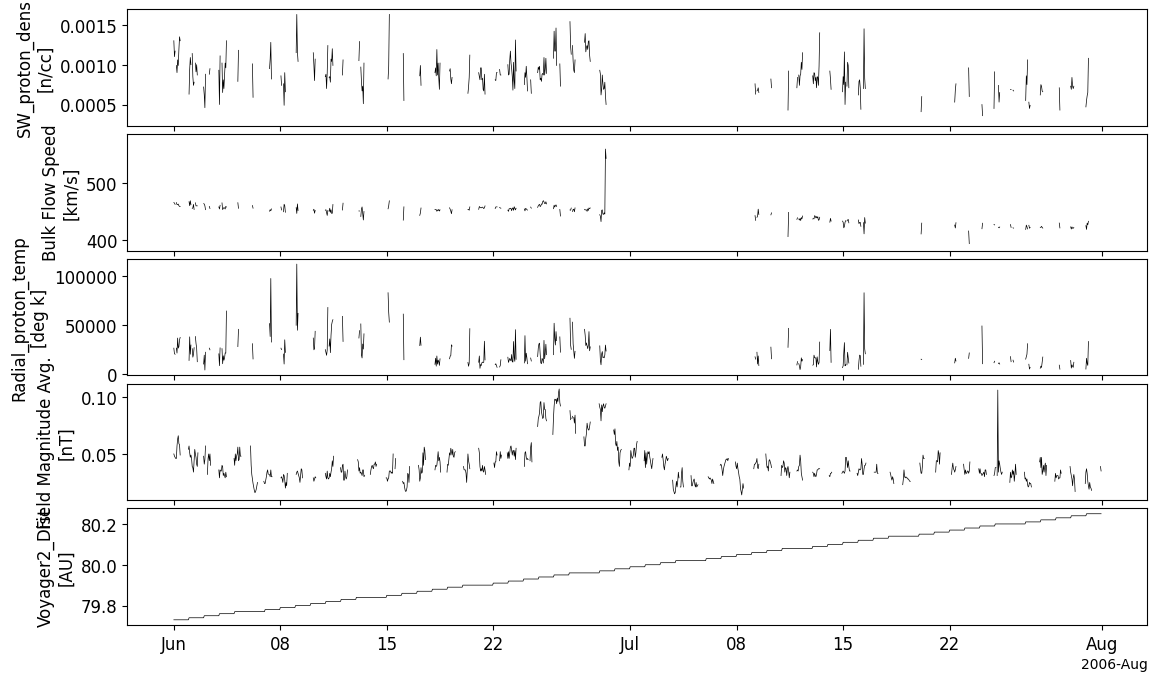

In [ ]:
pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B','v2_heliocentricDistance'])

### Discussion
Once you have settled on a few data sets (say between 3 and 5) consider the typical values being reported by Voyager 2.
During this time interval, V2 is still measure "solar wind" conditions in the outer heliosphere.
- Make a list of the typical values and their ranges for the solar wind conditions.  You will use these as comparisons later.

## Explore other time intervals
Using the code block below, add in the data sets you choose above and start exploring other time intervals between 2005 and 2020.




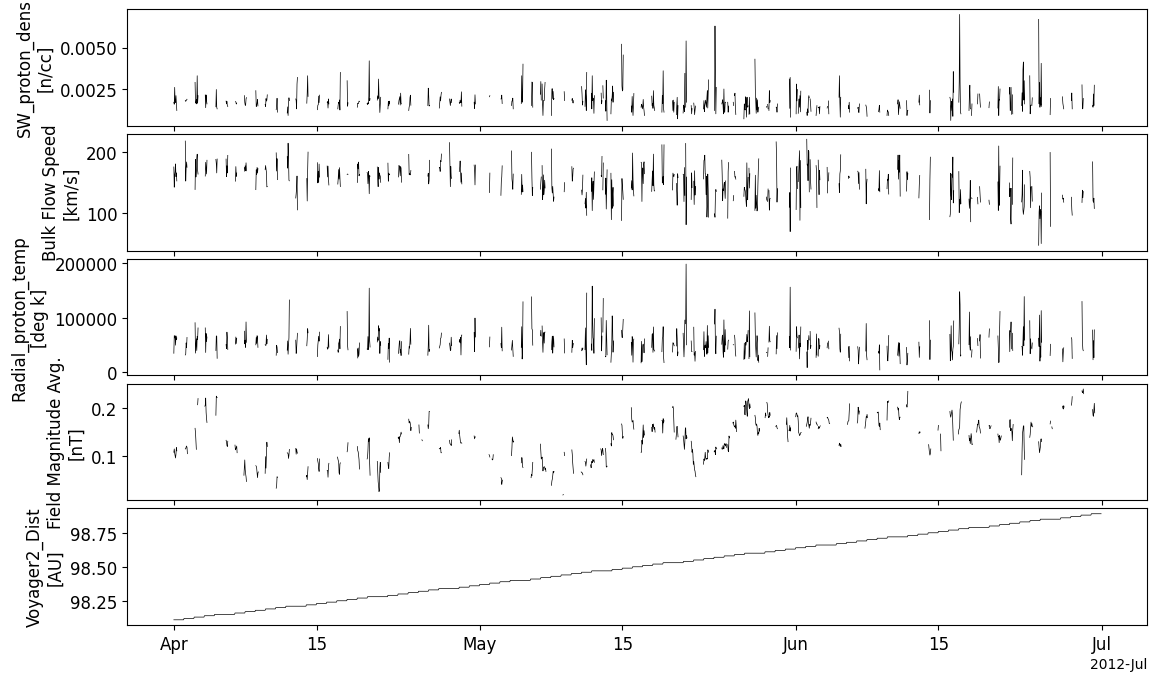

In [ ]:
#plot some other time intervals
pt.del_data("*") #clear the previous data set

#adjust these dates to explore different time intervals
start_time = '2012-04-01 00:00:00'
end_time = '2012-06-30 00:00:00'


urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')
clear_output()

pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B','v2_heliocentricDistance']) #add varialbes to the ploting list as you see fit.

### Discussion
- Are there conditions considerablly different from the solar wind conditions?  Make note of those conditions.


---



## Exploring the Structure of the Heliosphere
Copy the above cell in to new code blocks below and search for different regions of the outer heliosphere.
- Search for where the conditions change.  Try using a "binary search" or "search by halves" (cut the interval in half to see if the conditions have changed).
-  Identify the solar wind region, termination shock, heliosheath, heliopause, and interstellar medium.
- Collect and save plots of solar wind conditions that show each of these regions or boundaries.  
- Put those into a document or presentation with the appropriate lables.
- Add your table of relevant values or each region.  


### Solar Wind

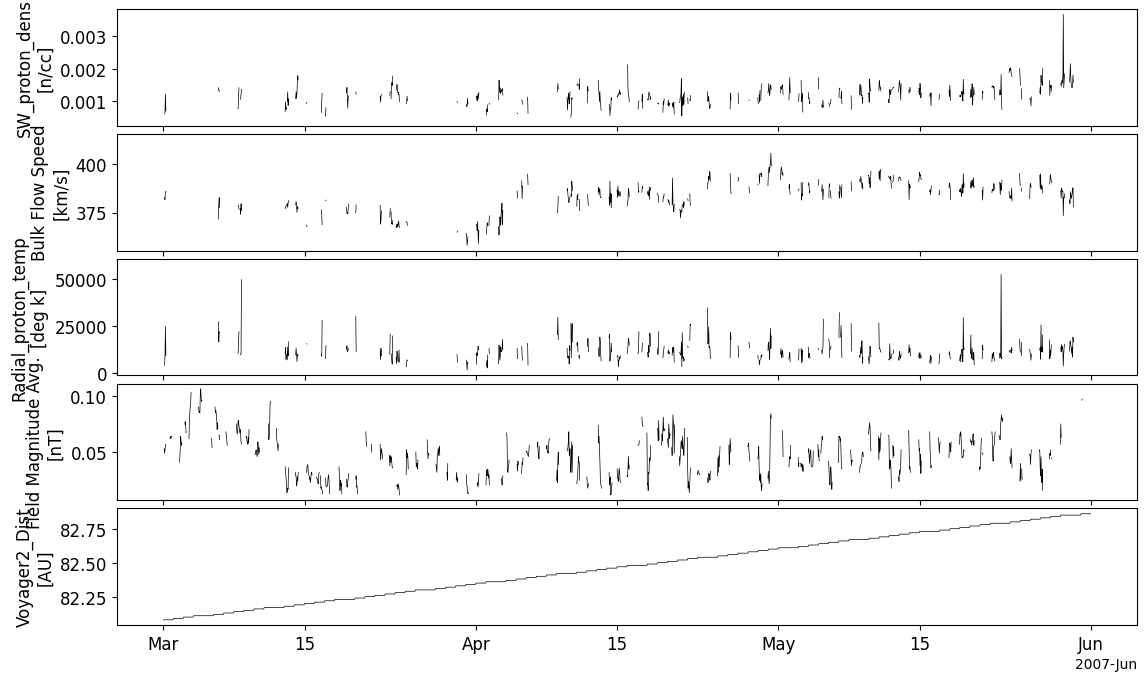

In [ ]:
#copy the above cell to explore different time intervals
#plot some other time intervals
pt.del_data("*") #clear the previous data set

#adjust these dates to explore different time intervals
start_time = '2007-03-01 00:00:00'
end_time = '2007-05-30 00:00:00'


urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')
clear_output()

pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B','v2_heliocentricDistance']) #add varialbes to the ploting list as you see fit.

###Termination Shock

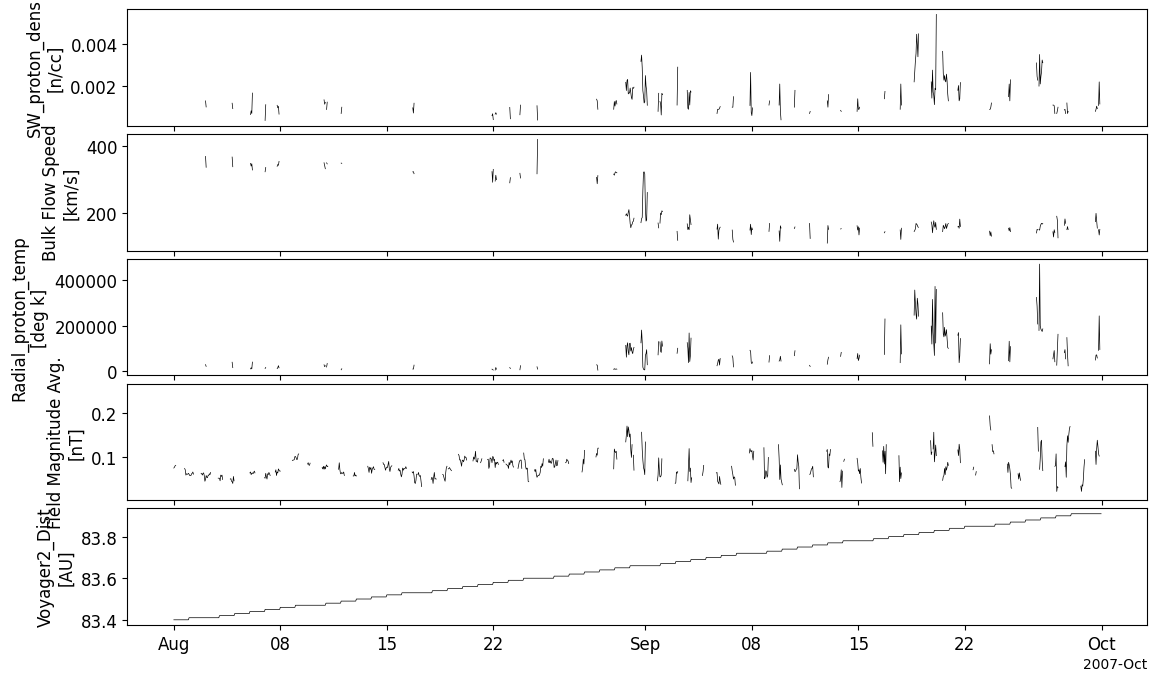

In [ ]:
#copy the above cell to explore different time intervals
#plot some other time intervals
pt.del_data("*") #clear the previous data set

#adjust these dates to explore different time intervals
start_time = '2007-08-01 00:00:00'
end_time = '2007-09-30 00:00:00'


urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')
clear_output()

pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B','v2_heliocentricDistance']) #add varialbes to the ploting list as you see fit.

### Heliosheath

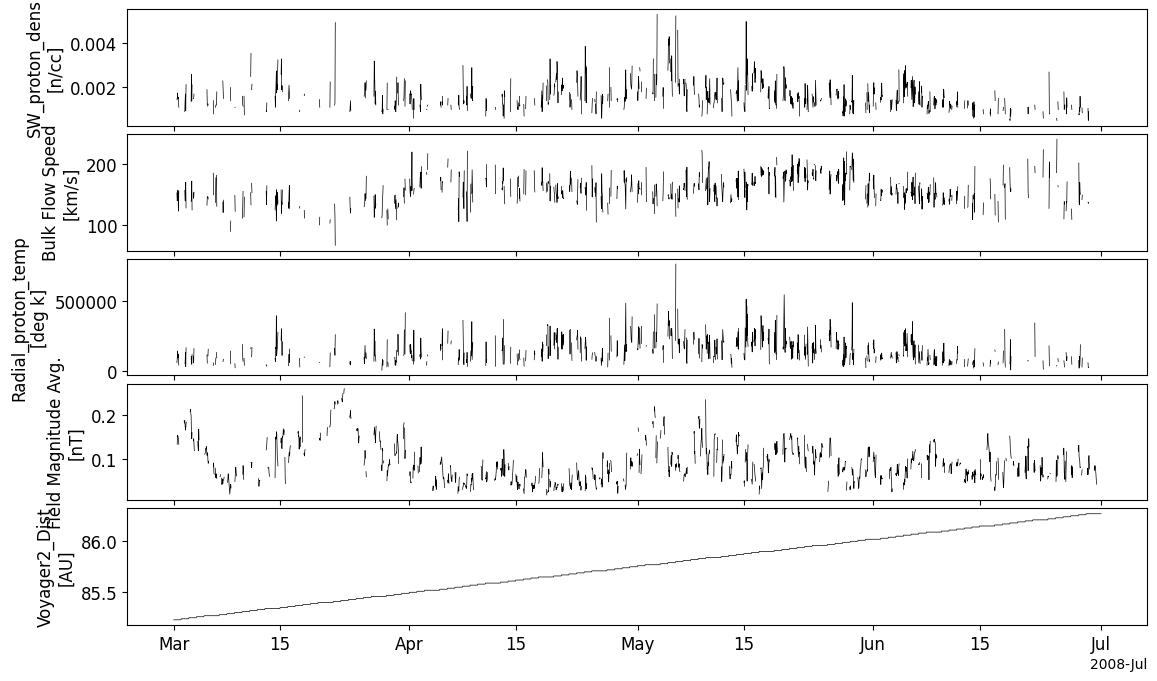

In [ ]:
#copy the above cell to explore different time intervals
#plot some other time intervals
pt.del_data("*") #clear the previous data set

#adjust these dates to explore different time intervals
start_time = '2008-03-01 00:00:00'
end_time = '2008-06-30 00:00:00'


urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')
clear_output()

pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B','v2_heliocentricDistance']) #add varialbes to the ploting list as you see fit.

###Heliopause

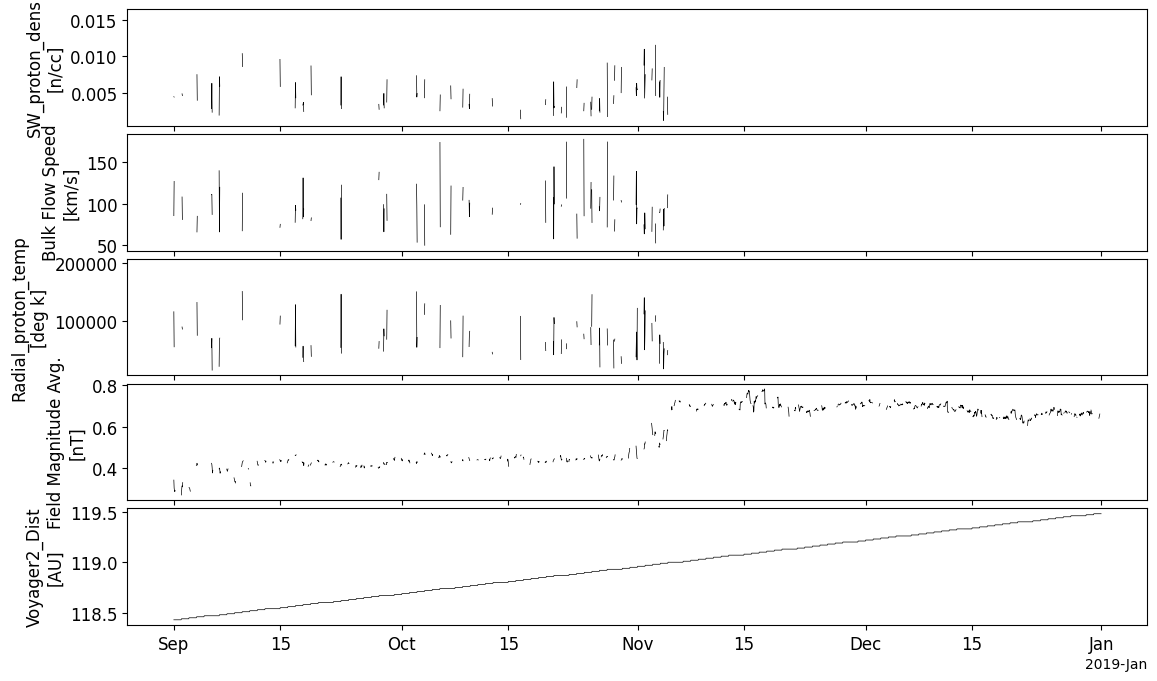

In [13]:
#copy the above cell to explore different time intervals
#plot some other time intervals
pt.del_data("*") #clear the previous data set

#adjust these dates to explore different time intervals
start_time = '2018-09-01 00:00:00'
end_time = '2018-12-30 00:00:00'


urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')
clear_output()

pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B','v2_heliocentricDistance']) #add varialbes to the ploting list as you see fit.

### Final Table
Record typical values for each region of the outer heloiosphere.  Add the paramters you chose in the appropriate place (parm 3, etc.).
If approprite, include a range of values that are seen in that region.

*Note the boundaries don't need parameter values*

Region | postion(AU) | density (#/cc) | velocity (km/s) | Temp(K) | Mag (T) | parm 5
-------------------|-------------------|------------------|------------------|------------------|------------------|------------------
Solar Wind | up to 84 | 0.001 - 0.002 | 300 - 400 | 10,000 - 50,000 | 0.01 - 0.1 | xxx
Termination Shock | 83-84  | xxx | xxx | xxx | xxx | xxx
Heliosheath | 84 - 119| 0.001 - 0.004 | 100 - 200 |  | 0.05 - 0.2  | xxx
Heliopause | 119 | xxx | xxx | xxx | 0.4 | xxx
ISM | 119 - | xxx | xxx | xxx | 0.7 | xxx